In [1]:
import pandas as pd
import os
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
plt.rc("font",family="Arial")

In [3]:
# for soma distribution
dfregion = pd.read_csv("markersRegion_perSubtype_7180.csv",index_col=0)

In [4]:
dfregion_plot = dfregion.pivot_table(columns="cluster",index="Region",values="avg_log2FC",aggfunc="mean").fillna(0)
dfregion_pvalue = dfregion.pivot_table(columns="cluster",index="Region",values="p_val_adj",aggfunc="mean").fillna(1)

In [5]:
dfregion_plot

cluster,1,2,3,4,5,6,7,8,9,11,...,22,23,24,25,26,27,28,29,30,31
Region,,,,,,,,,,,,,,,,,,,,,
AHN,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.302368,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143663,0.000000,0.000000,0.00000
ARH,0.000000,0.000000,0.00000,0.000000,0.188301,0.000000,0.000000,0.000000,0.000000,0.208731,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
HY,0.000000,0.000000,0.00000,0.198082,0.000000,0.179044,0.000000,0.000000,0.000000,0.000000,...,-0.375314,0.000000,0.000000,0.000000,0.000000,0.000000,0.134848,0.000000,0.000000,0.00000
LHA,-0.163470,0.000000,0.00000,-0.174523,0.000000,0.000000,0.000000,0.460533,-0.199499,-0.242863,...,-0.264162,0.279902,0.425037,-0.229945,0.000000,-0.237286,-0.081333,-0.142734,0.162581,0.11774
MBO,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.148871,0.000000,0.000000,0.000000,...,1.336562,0.000000,0.000000,0.000000,0.201759,0.000000,0.000000,0.000000,0.000000,0.00000
MPO,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.222699,0.00000
PH,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.235946,0.261647,0.000000,0.132107,0.000000,0.000000,0.000000,0.000000,0.00000
PSTN,0.000000,0.446782,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
PVH,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000


In [6]:
area_list = []
for i in dfregion_plot.columns.tolist():
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    area_list.extend([item for item in area if item not in area_list])
area_list.extend([item for item in dfregion_plot.index.tolist() if item not in area_list])
dfregion_plot2 =dfregion_plot.loc[area_list,:]
dfregion_pvalue2 =dfregion_pvalue.loc[area_list,:]

In [12]:
#split 1
area_list = []
for i in dfregion_plot.columns.tolist()[0:13]:
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    area_list.extend([item for item in area if item not in area_list])
area_list.extend([item for item in dfregion_plot.index.tolist() if item not in area_list])
dfregion_plot2 =dfregion_plot.loc[area_list,:].iloc[:,0:13]
dfregion_pvalue2 =dfregion_pvalue.loc[area_list,:].iloc[:,0:13]

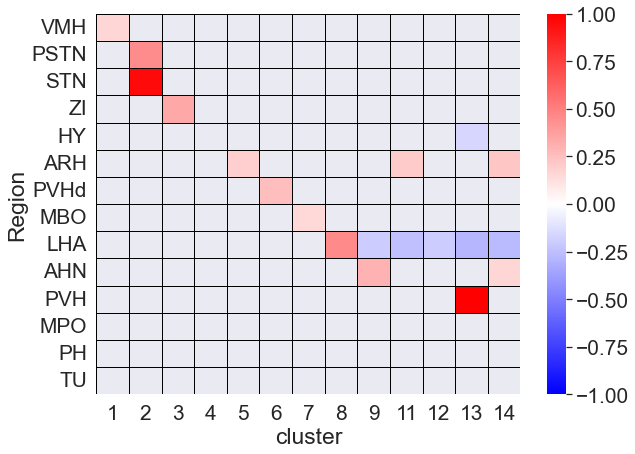

In [14]:
#split1
fig, ax = plt.subplots(figsize = (9.5,7))
sns.set(font_scale=1.9)
sns.heatmap(data = dfregion_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfregion_pvalue2>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region_split1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region_split1.jpg",dpi =600,format="jpg")

In [15]:
#split 2
area_list = []
for i in dfregion_plot.columns.tolist()[13:]:
    area =dfregion_plot.loc[dfregion_plot[i]>0].index.tolist()
    area_list.extend([item for item in area if item not in area_list])
area_list.extend([item for item in dfregion_plot.index.tolist() if item not in area_list])
dfregion_plot2 =dfregion_plot.loc[area_list,:].iloc[:,13:]
dfregion_pvalue2 =dfregion_pvalue.loc[area_list,:].iloc[:,13:]

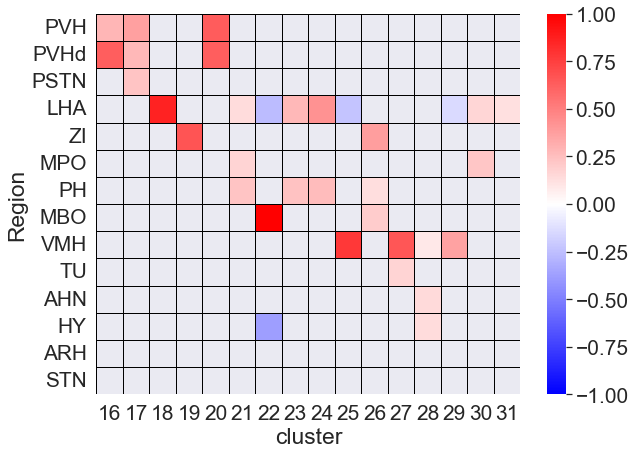

In [16]:
#split 2
fig, ax = plt.subplots(figsize = (9.5,7))
sns.set(font_scale=1.9)
sns.heatmap(data = dfregion_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfregion_pvalue2>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region_split2.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region_split2.jpg",dpi =600,format="jpg")

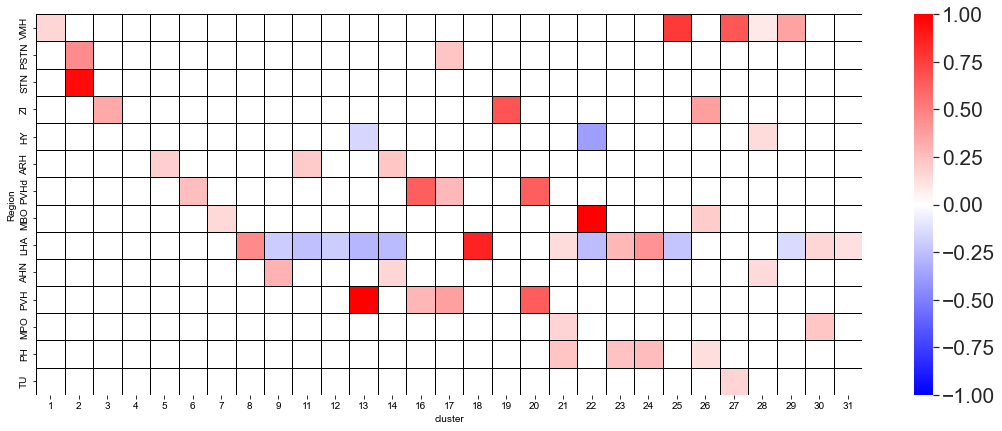

In [8]:
fig, ax = plt.subplots(figsize = (18.5,7))
sns.set(font_scale=1.9)
sns.heatmap(data = dfregion_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                  mask = dfregion_pvalue2>0.05
                 )
# plt.savefig("heatmap_for_intra_three_gene.jpg",dpi =300)
plt.savefig("heatmap_for_region1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_region1.jpg",dpi =600,format="jpg")

In [17]:
# for geno distribution
dfgeno = pd.read_csv("markersGeno_perSubtype_7180.csv",index_col=0)

In [18]:
dfgeno.gene = dfgeno.gene.str.capitalize()
dfgeno_plot = dfgeno.pivot_table(columns="cluster",index="gene",values="avg_log2FC",aggfunc="mean").fillna(0)
dfgeno_pvalue = dfgeno.pivot_table(columns="cluster",index="gene",values="p_val_adj",aggfunc="mean").fillna(1)

In [19]:
indexnew = ['Agrp','Wt(orexin)','Oxt','Pomc','Adcyap1','Nts','Pdyn','Penk','Sst','Tac1','Tac2','Trh']

In [20]:
dfgeno_plot = dfgeno_plot.loc[indexnew,:]
dfgeno_pvalue = dfgeno_pvalue.loc[indexnew,:]

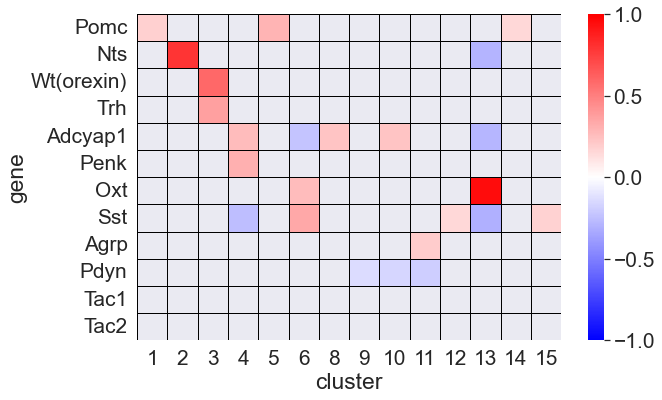

In [21]:
#split1
geno_list = []
for i in dfgeno_plot.columns.tolist()[0:14]:
    geno =dfgeno_plot.loc[dfgeno_plot[i]>0].index.tolist()
    geno_list.extend([item for item in geno if item not in geno_list])
geno_list.extend([item for item in dfgeno_plot.index.tolist() if item not in geno_list])
dfgeno_plot2 =dfgeno_plot.loc[geno_list,:].iloc[:,0:14]
dfgeno_pvalue2 =dfgeno_pvalue.loc[geno_list,:].iloc[:,0:14]

fig, ax = plt.subplots(figsize = (9.5,6))
sns.set(font_scale=1.9)
sns.heatmap(data = dfgeno_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                 mask = dfgeno_pvalue2>0.05
                 )

plt.savefig("heatmap_for_geno_split1.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_geno_split1.jpg",dpi =600,format="jpg")


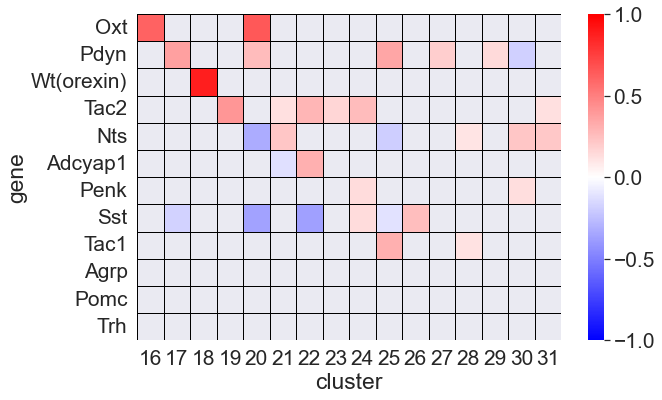

In [22]:
#split2
geno_list = []
for i in dfgeno_plot.columns.tolist()[14:]:
    geno =dfgeno_plot.loc[dfgeno_plot[i]>0].index.tolist()
    geno_list.extend([item for item in geno if item not in geno_list])
geno_list.extend([item for item in dfgeno_plot.index.tolist() if item not in geno_list])
dfgeno_plot2 =dfgeno_plot.loc[geno_list,:].iloc[:,14:]
dfgeno_pvalue2 =dfgeno_pvalue.loc[geno_list,:].iloc[:,14:]

fig, ax = plt.subplots(figsize = (9.5,6))
sns.set(font_scale=1.9)
sns.heatmap(data = dfgeno_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                 mask = dfgeno_pvalue2>0.05
                 )

plt.savefig("heatmap_for_geno_split2.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_geno_split2.jpg",dpi =600,format="jpg")

In [46]:
geno_list = []
for i in dfgeno_plot.columns.tolist():
    geno =dfgeno_plot.loc[dfgeno_plot[i]>0].index.tolist()
    geno_list.extend([item for item in geno if item not in geno_list])
geno_list.extend([item for item in dfgeno_plot.index.tolist() if item not in geno_list])
dfgeno_plot2 =dfgeno_plot.loc[geno_list,:]
dfgeno_pvalue2 =dfgeno_pvalue.loc[geno_list,:]

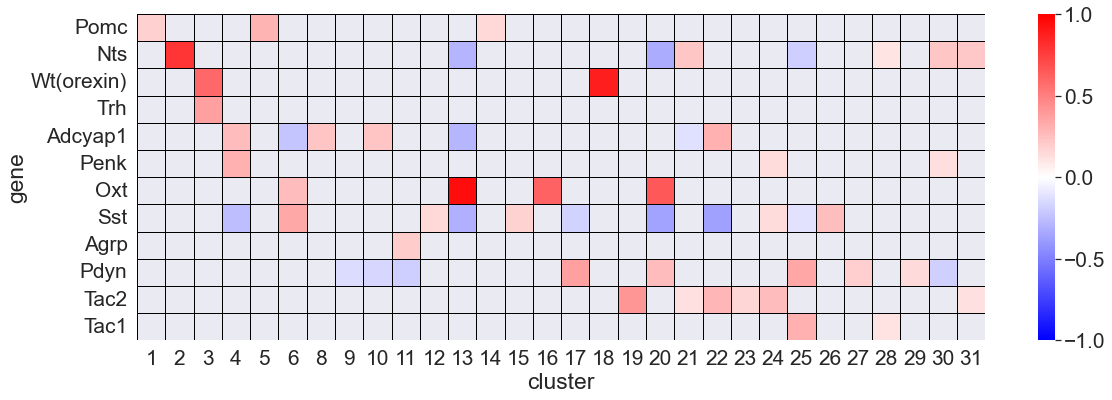

In [47]:
fig, ax = plt.subplots(figsize = (19,6))
sns.set(font_scale=1.9)
sns.heatmap(data = dfgeno_plot2,cmap="bwr",vmin=-1,
                 vmax=1,linewidths=1, linecolor='black',annot=False,fmt="g",
                 mask = dfgeno_pvalue2>0.05
                 )

plt.savefig("heatmap_for_geno.pdf",dpi =600,format="pdf")
plt.savefig("heatmap_for_geno.jpg",dpi =600,format="jpg")